### Importing all Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df=pd.read_csv(r"E:\Datascience\Data set\sales_data_with_revenue.csv")


### Printing first 20 Rows

In [34]:
print(df.head(20))

   product_category  units_sold  price_per_unit  is_returned   sale_date  \
0                 C          96      356.542747            0  2020-01-01   
1                 D          94      386.211956            1  2020-01-02   
2                 A          47       52.772188            1  2020-01-03   
3                 C          99      257.990939            0  2020-01-04   
4                 C          55      466.687028            1  2020-01-05   
5                 D          40      167.114674            0  2020-01-06   
6                 A          52      301.002718            1  2020-01-07   
7                 A          16      190.922936            0  2020-01-08   
8                 C          13      232.591306            0  2020-01-09   
9                 B          30      278.815528            0  2020-01-10   
10                C          19      278.971770            0  2020-01-11   
11                C          17      108.847927            1  2020-01-12   
12          

### Data Cleaning

In [35]:
df=pd.read_csv(r"E:\Datascience\Data set\sales_data_with_revenue.csv")
df.columns = [col.replace(" ", "_") for col in df.columns]
df.dropna(inplace=True)
numeric_column = 'numeric_column'
if numeric_column in df.columns:
    df[numeric_column].fillna(df[numeric_column].mean(), inplace=True)
categorical_column = 'categorical_column'
if categorical_column in df.columns:
    df[categorical_column].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)
print(df.shape)
df.isna().sum()
df.info()

(600, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_category  600 non-null    object 
 1   units_sold        600 non-null    int64  
 2   price_per_unit    600 non-null    float64
 3   is_returned       600 non-null    int64  
 4   sale_date         600 non-null    object 
 5   total_revenue     600 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.2+ KB


### Searching for Duplicates

In [36]:
print(df.duplicated().sum())

0


### Statistical Analysis

       units_sold  price_per_unit  is_returned  total_revenue
count  600.000000      600.000000   600.000000     600.000000
mean    49.755000      261.336305     0.498333    2060.081749
std     29.340753      142.508264     0.500414    1533.020936
min      1.000000       10.116387     0.000000       5.898860
25%     24.000000      136.865445     0.000000     752.983889
50%     51.000000      268.132628     0.000000    1622.882745
75%     75.000000      385.321422     1.000000    3182.433373
max     99.000000      499.683215     1.000000    5645.523507
   product_category  units_sold  price_per_unit  is_returned   sale_date  \
0                 C          96      356.542747            0  2020-01-01   
1                 D          94      386.211956            1  2020-01-02   
2                 A          47       52.772188            1  2020-01-03   
3                 C          99      257.990939            0  2020-01-04   
4                 C          55      466.687028            1  

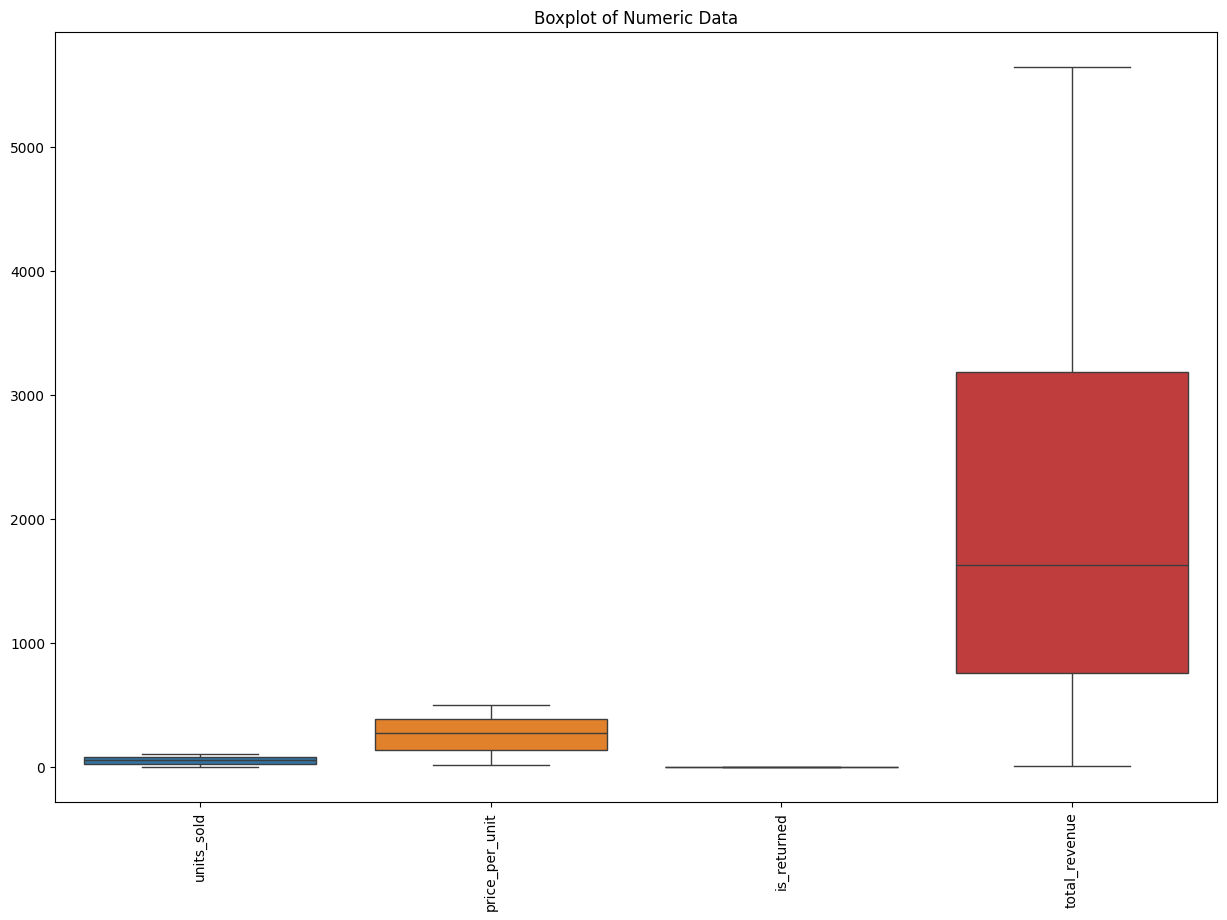

In [37]:
numeric_data = df.select_dtypes(include=['float64', 'int64'])
stat_an=numeric_data.describe()
print(stat_an)
print(df.head(20))
print(df.tail())
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Numeric Data')
plt.xticks(rotation=90)  
plt.show()

### Correlation

                units_sold  price_per_unit  is_returned  total_revenue
units_sold        1.000000        0.016136     0.011399       0.959236
price_per_unit    0.016136        1.000000     0.004801       0.155943
is_returned       0.011399        0.004801     1.000000       0.014218
total_revenue     0.959236        0.155943     0.014218       1.000000


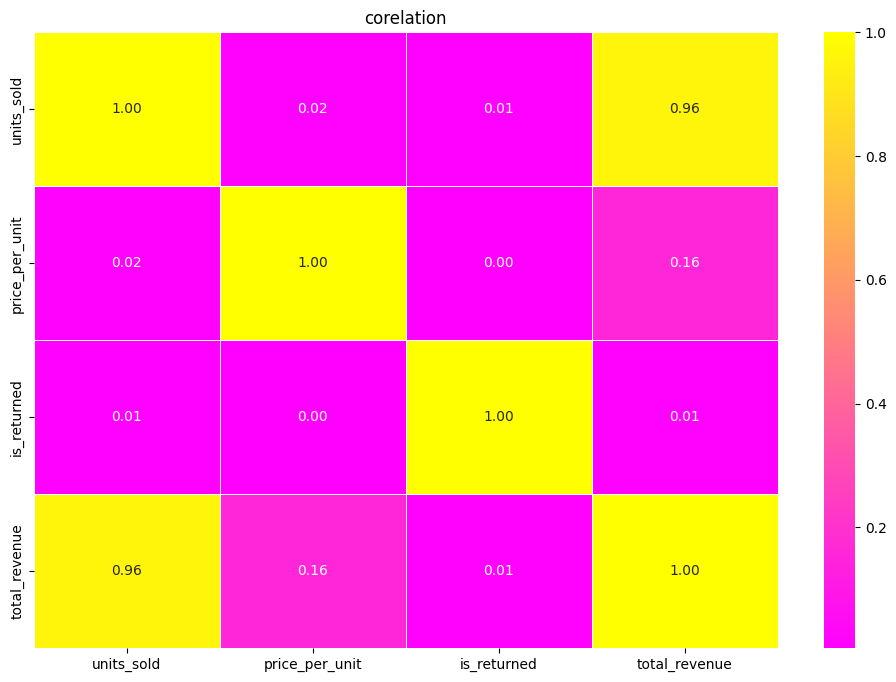

In [38]:
corelation=numeric_data.corr()
print(corelation)
plt.figure(figsize=(12,8))
sns.heatmap(corelation,cmap='spring',annot=True,fmt='.2f',linewidths=0.5)
plt.title("corelation")
plt.show()

### Model Building and Prediction

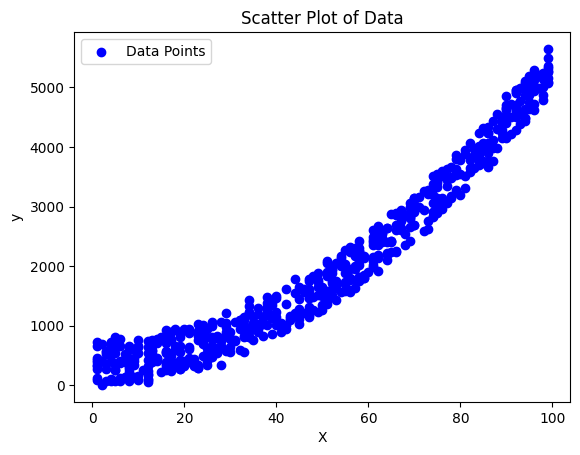

Mean Squared Error (MSE): 48099.5565
R-squared (R2): 97.9499
[[411.85861817]]


c:\Users\AKASH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


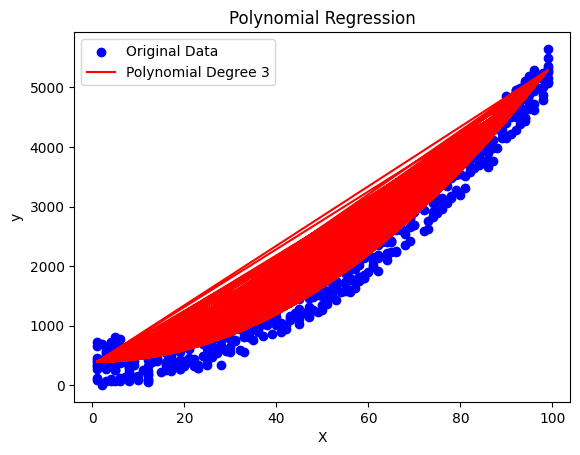

In [45]:
x=df[['units_sold']]
y=df[['total_revenue']]


plt.scatter(x, y, color="blue", label="Data Points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of Data")
plt.legend()
plt.show()

degree = 3  # Degree of the polynomial
poly = PolynomialFeatures(degree=degree)
x_poly = poly.fit_transform(x)


model = LinearRegression()
model.fit(x_poly, y)

y_pred = model.predict(x_poly)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)*100

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


x_new_poly = poly.transform([[6.5]])
y1_pred = model.predict(x_new_poly)
print(y1_pred)
plt.scatter(x, y, color="blue", label="Original Data")
plt.plot(x, y_pred, color="red", label=f"Polynomial Degree {degree}")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression")
plt.legend()
plt.show()
